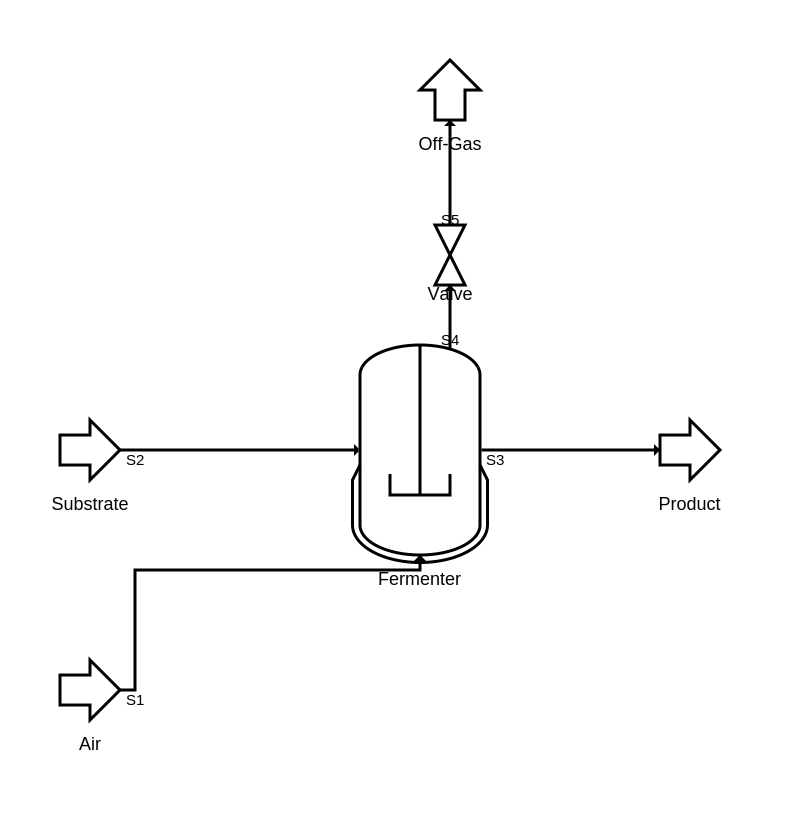

In [1]:
from pyflowsheet import Flowsheet, UnitOperation, Distillation, Vessel, BlackBox, Pump, Stream, StreamFlag, Valve,HeatExchanger,Mixer, Splitter, Port, SvgContext
from pyflowsheet import VerticalLabelAlignment, HorizontalLabelAlignment
from pyflowsheet.internals import Tubes, Stirrer, StirrerType, Jacket
from IPython.core.display import SVG, HTML

pfd= Flowsheet("Demo","Simple Distillation", "Demo Flowsheet for showing different styling options")

U1=pfd.unit(StreamFlag("Air","Off-Page Connector", position=(00,400)))
U2=pfd.unit(StreamFlag("Substrate","Off-Page Connector", position=(00,240)))
U3=pfd.unit(Vessel("Fermenter","Fermenter", position=(200,190), capLength=20, showCapLines=False, size=(80,140),internals=[Stirrer(type=StirrerType.Anchor), Jacket()] ))
U4=pfd.unit(StreamFlag("Off-Gas","Off-Page Connector", position=(240,000)))
U5=pfd.unit(StreamFlag("Product","Off-Page Connector", position=(400,240)))
U6=pfd.unit(Valve("Valve","Relief Valve", position=(240,120)))

U4.rotate(-90)
U6.rotate(-90)
U3.ports["In2"] = Port("In2", U3, (0, 0.5), (-1, 0))
U3.ports["Out2"] = Port("Out2", U3, (1, 0.5), (1, 0))
U3.ports["Out"].relativePosition=(60/80,0.02)

pfd.connect("S1", U1["Out"],U3["In"] )
pfd.connect("S2", U2["Out"],U3["In2"] )
pfd.connect("S3", U3["Out2"],U5["In"] )
pfd.connect("S4", U3["Out"],U6["In"] )
pfd.connect("S5", U6["Out"],U4["In"] )

#pfd.showGrid=True
ctx= SvgContext("../img/fermenter_example.svg")
img = pfd.draw(ctx)
SVG(img.render(scale=1.5))
